# 期权定价问题

*Copyright (c) 2022 Institute for Quantum Computing, Baidu Inc. All Rights Reserved.*

期权定价的任务是评估当前股票期权在到期日的预期价值。决定期权价值的因素有很多，包括当前股票价格、内在价值、到期时间或时间价值、波动性、利率和支付的现金股息。许多期权定价模型以这些因素作为模型的参数，用来确定期权的公允市场价值，其中最广为人知的是布莱克-斯科尔斯模型（Black-Scholes model）。布莱克-斯科尔斯模型可以通过使用少量输入参数的简单且可分析求解的模型对各种金融衍生品进行定价。该模型认为，大量交易资产的价格遵循几何布朗运动，具有恒定的漂移和波动。当应用于股票期权时，该模型包含股票的恒定价格变化、货币的时间价值、期权的执行价格以及期权到期的时间。特别地，股票或期货合约等工具在随机游走后将具有服从对数正态分布的价格，具有恒定的漂移和波动性。

欧式期权定价是布莱克-斯科尔斯模型的一个简单应用，该模型可以用来计算欧式看涨期权的价格。欧式看涨期权赋予期权持有人在到期日 $T$ 以预先商定的价格 $K$ 购买股票的权利。通常，期权收益函数为 
$$
f(S_{T})=\max\{0, S_{T}-K\}, \tag{1}
$$
其中 $S_{T}$ 表示期权到期日的资产价格（asset price），$K$ 表示预先商定的价格（strike price）。这里，资产价格 $S_{T}$ 在布莱克-斯科尔斯模型下服从一个已知的概率分布，且依赖于初始价格（initial price），无风险利率（risk-free interest rate），波动性（volatility）以及期权到期日（maturity date） $T$。在经典计算中，期权股票到期时的期望价值可以通过蒙特卡罗方法计算：从已知的（风险中性）概率分布中获取市场样本，然后计算给定该市场样本的资产价格。之后，计算给定资产价格的期权收益，最后，对多个样本的收益求平均值，得出期权价格的近似值。

## 量子解决方案

不同于经典算法，量子蒙特卡洛（quantum Monte Carlo）方法的核心是用量子电路模拟概率分布并将资产价格储存在量子态中，进而通过量子振幅估计算法并行计算收益的平均值。通过量子叠加和纠缠的特性，量子方案与经典方案相比具有二次加速的优势。接下来我们以欧式看涨期权为例，展示如何使用量桨来模拟该量子方案，从而完成欧式看涨期权的风险中性定价问题。

### 在线演示

我们已经给出了一个设置好的参数，可以直接用于欧式看涨期权的定价。只需要在 `config.toml` 这个配置文件中进行对应的配置，然后输入命令 
`python  euro_pricing.py --config config.toml`
即可对配置好的欧式期权进行定价。

这里，我们给出一个在线演示的版本，可以在线进行测试。首先定义配置文件的内容：

In [1]:
euro_toml = r"""
# 用于计算期权定价模型的整体配置文件。
# 初始价格。
initial_price = 100
# 既定价格。
strike_price = 110
# 无风险利率。
interest_rate = 0.05
# 市场波动性。
volatility = 0.1
# 期权到期日（以年为单位）。
maturity_date = 1
# 估计精度指数。
degree_of_estimation = 5
"""

量桨的金融模块实现了量子蒙特卡洛方案的数值模拟。我们可以从 ``paddle_quantum.finance`` 模块里导入 ``EuroOptionEstimator`` 来解决配置好的期权定价问题。

该期权的风险中性价格大约为 2.2613329887390137
以下是该量子方案的电路实现图。


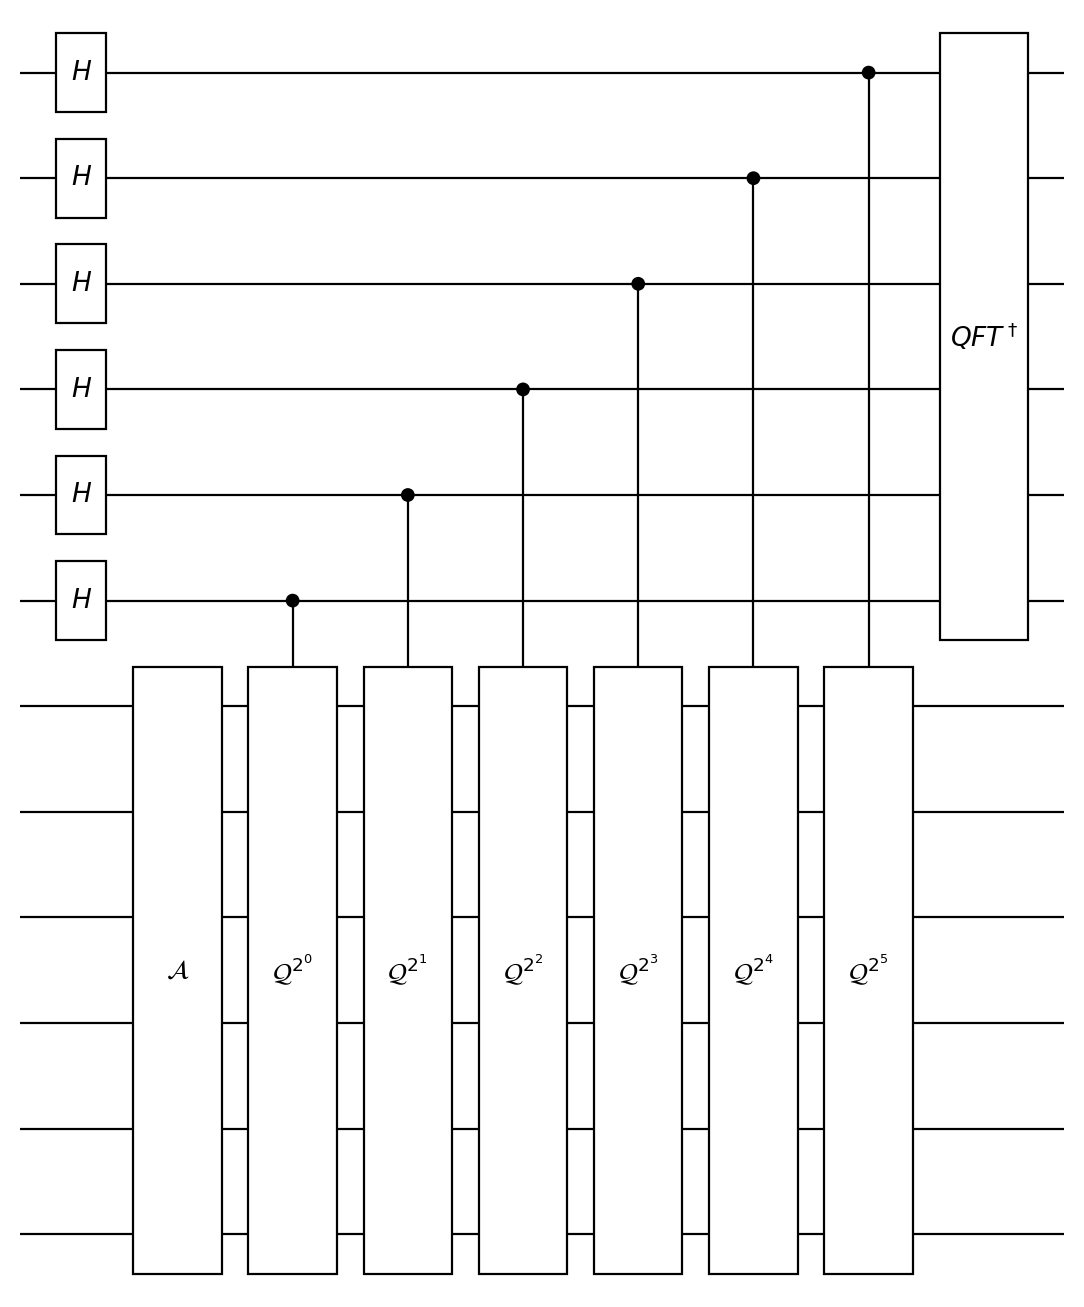

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

import toml
from paddle_quantum.finance import EuroOptionEstimator

config = toml.loads(euro_toml)
initial_price = config["initial_price"]
strike_price = config["strike_price"]
interest_rate = config["interest_rate"]
volatility = config["volatility"]
maturity_date = config["maturity_date"]
degree_of_estimation = config["degree_of_estimation"]


estimator = EuroOptionEstimator(initial_price, strike_price, interest_rate, volatility, maturity_date, degree_of_estimation)
print("该期权的风险中性价格大约为", estimator.estimate())
print("以下是该量子方案的电路实现图。")
estimator.plot()

通过修改配置文件的内容，并运行预测代码，即可在线对模型进行测试。

___

# 注意事项

这里提供的模型只用于解决布莱克-斯科尔斯模型的期权定价问题。

# 引用信息

```
@article{rebentrost2018quantum,
  title = {Quantum Computational Finance: {{Monte Carlo}} Pricing of Financial Derivatives},
  shorttitle = {Quantum Computational Finance},
  author = {Rebentrost, Patrick and Gupt, Brajesh and Bromley, Thomas R.},
  year = {2018},
  month = aug,
  journal = {Physical Review A},
  volume = {98},
  number = {2},
  pages = {022321},
  publisher = {{American Physical Society}},
  doi = {10.1103/PhysRevA.98.022321},
  url = {https://link.aps.org/doi/10.1103/PhysRevA.98.022321},
}
```

# 参考文献

[1] Rebentrost, Patrick, Brajesh Gupt, and Thomas R. Bromley. "Quantum computational finance: Monte Carlo pricing of financial derivatives." Physical Review A 98.2 (2018): 022321.